In [2]:
pip install gym[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.3 MB/s 
     |████████████████████████████████| 1.2 MB 60.9 MB/s 
     |████████████████████████████████| 3.4 MB 51.7 MB/s 
     |████████████████████████████████| 18.3 MB 24.8 MB/s 
     |████████████████████████████████| 2.1 MB 50.6 MB/s 
     |████████████████████████████████| 3.5 MB 67.8 MB/s 
     |████████████████████████████████| 296 kB 71.2 MB/s 
     |████████████████████████████████| 2.4 MB 68.4 MB/s 
     |████████████████████████████████| 3.7 MB 37.7 MB/s 
     |████████████████████████████████| 207 kB 75.9 MB/s 
     |████████████████████████████████| 3.1 MB 36.6 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
   

In [3]:
 pip install -U gym[atari,accept-rom-license]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441027 sha256=aaa72fa9a54f75165b39f2d3b05e3840bdd017f240761d73e67ba6bd87092b46
  Stored in directory: /root/.cache/pip/wheels/87/67/2e/6147e7912fe37f5408b80d07527dab807c1d25f5c403a9538a
Successfully built AutoROM.accept-rom-license


In [4]:
 !AutoROM --accept-license

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.7/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/adventure.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/air_raid.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/alien.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/amidar.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/assault.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/asterix.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/asteroids.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/atlantis.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/atlantis2.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/backgammon.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/bank_heist.bin
Installed /usr/l

In [5]:
pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#import libraries
import torch
from torch import nn
import gym
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
from einops import rearrange
%matplotlib inline

In [27]:
#defining the new frame size
frame_size= 28

In [28]:
#set device to cuda if it exists 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
print(device)

cuda


In [29]:
#checking if we have the wanted environment.
print(gym.envs.registry.values())

dict_values([EnvSpec(id='ALE/Tetris-v5', entry_point='gym.envs.atari:AtariEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=27000, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={'game': 'tetris', 'obs_type': 'rgb', 'repeat_action_probability': 0.25, 'full_action_space': False, 'frameskip': 4}, namespace='ALE', name='Tetris', version=5), EnvSpec(id='ALE/Tetris-ram-v5', entry_point='gym.envs.atari:AtariEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=27000, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={'game': 'tetris', 'obs_type': 'ram', 'repeat_action_probability': 0.25, 'full_action_space': False, 'frameskip': 4}, namespace='ALE', name='Tetris-ram', version=5), EnvSpec(id='ALE/Et-v5', entry_point='gym.envs.atari:AtariEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=27000, order_enforce=True, autoreset=False, disable_env_checker=Fal

In [30]:
env = gym.make("Pong-v4", render_mode='rgb_array')

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [40]:
class prepossessing:

  def __init__(self, exclude, output):
    self.exclude= exclude
    self.output= output



 
  def preprocess_frame(self, frame):
    """Preprocess Image.
        
        Params
        ======
            screen (array): RGB Image
            exclude (tuple): Section to be croped (UP, RIGHT, DOWN, LEFT)
            output (int): Size of output image
        """
    # TConver image to gray scale
    gray_image = cv2.cvtColor(frame , cv2.COLOR_RGB2GRAY)
    thresh= 127
    im_b = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)[1]
    #convert the image to Blackandwhite
    #(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    #Crop screen[Up: Down, Left: right] 
    #cropped_image  = gray_image[self.exclude[0]:self.exclude[2], self.exclude[3]:self.exclude[1]]
    cropped_image  = im_b[self.exclude[0]:self.exclude[2], self.exclude[3]:self.exclude[1]]

    # Convert to float, and normalized
    normalized_image  = np.ascontiguousarray(cropped_image , dtype=np.float32) / 255
    #normalized_image  = np.ascontiguousarray(im_b , dtype=np.float32) / 255
    # Resize image to 84 * 84
    #final_frame  = cv2.resize(normalized_image , (self.output, self.output), interpolation = cv2.INTER_AREA)
    final_frame  = cv2.resize(normalized_image, (self.output, self.output), interpolation = cv2.INTER_AREA)
    return final_frame


  #this function is iportant to know which way the ball is moving
  def stack_frame(self, stacked_frames, frame, is_new):
      """Stacking Frames.
          
          Params
          ======
              stacked_frames (array): Four Channel Stacked Frame
              frame: Preprocessed Frame to be added
              is_new: Is the state First
          """
      if is_new:
          stacked_frames = np.stack(arrays=[frame, frame, frame, frame])
          stacked_frames = stacked_frames
      else:
          stacked_frames[0] = stacked_frames[1]
          stacked_frames[1] = stacked_frames[2]
          stacked_frames[2] = stacked_frames[3]
          stacked_frames[3] = frame
      
      return stacked_frames
      #this function is iportant to know which way the ball is moving
    
  def stack_frames(self,frames, state, is_new=False):
    frame = self.preprocess_frame(state)
    frames = self.stack_frame(frames, frame, is_new)
    return frames

(210, 160, 3)


/usr/local/lib/python3.7/dist-packages/gym/core.py:44: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


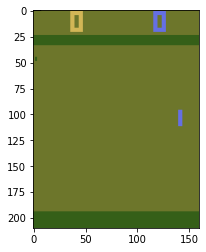

In [41]:
#show the frames of the game
first_frame=env.reset()
plt.imshow(env.render(mode="rgb_array"))
print(env.render(mode="rgb_array").shape)

In [42]:
#show the avilabe actions
print(env.action_space)
env.unwrapped.get_action_meanings()

Discrete(6)


['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

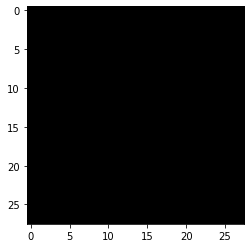

In [43]:
pre= prepossessing((30, -4, -12, 4), frame_size)
frame= pre.preprocess_frame(first_frame)
plt.imshow(frame, cmap='gray')

In [44]:
#playing using random actions
state = pre.stack_frames(None, env.reset(), True) 
score=0
print(state.shape)
for j in range(200):
    action = random.randrange(env.action_space.n)
    next_state, reward, done, _ = env.step(action)
    score+=reward
    state = pre.stack_frames(state, next_state, False)
    if done:
      break 
print(score)

(4, 28, 28)
-1.0


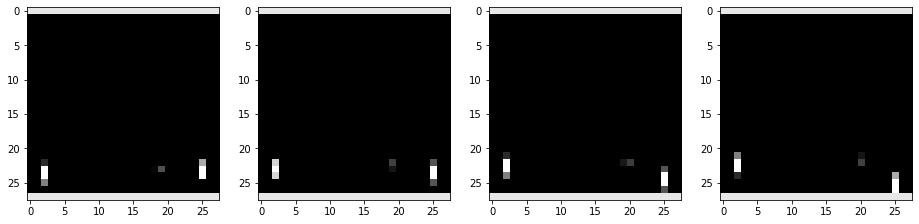

In [45]:
#showing how our state looks like
plt.figure(1, figsize=(20, 10))
for i in range(len(state)):
  plt.subplot(1,5,i+1)
  plt.imshow(state[i], cmap='gray')
plt.show()

In [46]:
#defining the multihead relational model
class RelationalModel (torch.nn.Module):
  def __init__(self):
    super(RelationalModel, self).__init__()
    self.conv1_ch = 16 
    self.conv2_ch = 20
    self.H = frame_size
    self.W = frame_size
    self.node_size = frame_size*frame_size
    self.out_dim = 6
    self.ch_in = 4
    self.sp_coord_dim = 2
    self.N = int(frame_size**2)
    self.n_heads = 3

    self.conv1 = nn.Conv2d(self.ch_in,self.conv1_ch,kernel_size=(1,1),padding=0) #A
    self.conv2 = nn.Conv2d(self.conv1_ch,self.conv2_ch,kernel_size=(1,1),padding=0)
    self.proj_shape = (self.conv2_ch+self.sp_coord_dim,self.n_heads * self.node_size)
    self.k_proj = nn.Linear(*self.proj_shape)
    self.q_proj = nn.Linear(*self.proj_shape)
    self.v_proj = nn.Linear(*self.proj_shape)

    self.k_lin = nn.Linear(self.node_size,self.N) #B
    self.q_lin = nn.Linear(self.node_size,self.N)
    self.a_lin = nn.Linear(self.N,self.N)
    
    self.node_shape = (self.n_heads, self.N,self.node_size)
    self.k_norm = nn.LayerNorm(self.node_shape, elementwise_affine=True) #maybe the size should be keydim like the attention all we need
    self.q_norm = nn.LayerNorm(self.node_shape, elementwise_affine=True)
    self.v_norm = nn.LayerNorm(self.node_shape, elementwise_affine=True)
    
    self.linear1 = nn.Linear(self.n_heads * self.node_size, self.node_size)
    self.norm1 = nn.LayerNorm([self.N,self.node_size], elementwise_affine=False)
    self.linear2 = nn.Linear(self.node_size, self.out_dim)

  def forward(self,x):
      N,Cin, H, W = x.shape
      #x.to(device)
      x = self.conv1(x) 
      x = torch.relu(x)
      x = self.conv2(x) 
      x = torch.relu(x)
      with torch.no_grad(): 
          self.conv_map = x.clone() #C
      _,_,cH,cW = x.shape
      xcoords = torch.arange(cW).repeat(cH,1).float() / cW
      ycoords = torch.arange(cH).repeat(cW,1).transpose(1,0).float() / cH
      spatial_coords = torch.stack([xcoords,ycoords],dim=0).to(device)
      spatial_coords = spatial_coords.unsqueeze(dim=0)
      spatial_coords = spatial_coords.repeat(N,1,1,1)
      x = torch.cat([x,spatial_coords],dim=1)
      x = x.permute(0,2,3,1)
      x = x.flatten(1,2)
      
      K = rearrange(self.k_proj(x), "b n (head d) -> b head n d", head=self.n_heads)
      K = self.k_norm(K) 
      
      Q = rearrange(self.q_proj(x), "b n (head d) -> b head n d", head=self.n_heads)
      Q = self.q_norm(Q) 
      
      V = rearrange(self.v_proj(x), "b n (head d) -> b head n d", head=self.n_heads)
      V = self.v_norm(V) 
      A = torch.nn.functional.elu(self.q_lin(Q) + self.k_lin(K)) #D should be multiplication isntead of sum
      A = self.a_lin(A)
      A = torch.nn.functional.softmax(A,dim=3) 
      with torch.no_grad():
          self.att_map = A.clone() #E
      E = torch.einsum('bhfc,bhcd->bhfd',A,V) #F
      E = rearrange(E, 'b head n d -> b n (head d)')
      E = self.linear1(E)
      E = torch.relu(E)
      E = self.norm1(E)
      E = E.max(dim=1)[0]
      y = self.linear2(E)
      y = torch.nn.functional.elu(y)
      return y

In [47]:
first_frame= env.reset()
gray_image=cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY)
#(thresh, im_bw) = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh= 100
im_bw = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)[1]

croppedimage= im_bw[30: -12, 4:-4]

In [48]:
#could be updated to add the number of chanels in or the epoch number "Maybe Batch number"
def prepare_state(x):
    ns = torch.from_numpy(x).float().permute(0,1,2).unsqueeze(dim=0)
    #ns = torch.from_numpy(x).float()
    maxv = ns.flatten().max()
    ns = ns / maxv
    return ns
 
def get_minibatch(replay,size):
    batch_ids = np.random.randint(0,len(replay),size)
    batch = [replay[x] for x in batch_ids] #list of tuples
    state_batch = torch.cat([s for (s,a,r,s2,d) in batch],)
    state_batch= state_batch.to(device)
    action_batch = torch.Tensor([a for (s,a,r,s2,d) in batch]).long()
    acrion_batch= action_batch.to(device)
    reward_batch = torch.Tensor([r for (s,a,r,s2,d) in batch])
    reward_batch= reward_batch.to(device)
    state2_batch = torch.cat([s2 for (s,a,r,s2,d) in batch],dim=0)
    state2_batch= state2_batch.to(device)
    done_batch = torch.Tensor([d for (s,a,r,s2,d) in batch])
    done_batch= done_batch.to(device)
    return state_batch,action_batch,reward_batch,state2_batch, done_batch
 
def get_qtarget_ddqn(qvals,r,df,done):
    targets = r + (1-done) * df * qvals
    return targets

In [49]:
#the loss function
def lossfn(pred,targets,actions):
    loss = torch.mean(torch.pow(targets.detach()-pred.gather(dim=1,index=actions.unsqueeze(dim=1)).squeeze(),2),dim=0).to(device)
    return loss

#update the experince replay
'''
The update_replay function adds new memories to the experience replay if it is
not yet full; if it is full, it will replace random memories with new ones. If 
the memory resulted in a positive reward, we add 50 copies of that memory, 
since positive reward memories are rare and we want to enrich the 
experience replay with these more important memories.
'''
def update_replay(replay,exp,replay_size):
  r = exp[2]
  N = 1
  if r > 0:
      N = 50
  for i in range(N):
      replay.append(exp)
  return replay
 
action_map = {
    0:0, 
    1:1,
    2:2,
    3:3,
    4:4,
    5:5
}


In [50]:
def showLoss(rewards,los, i_episode):
  scores=[]
  for i in range(len(los)):
    scores.append(los[i].item())
  print('\rEpisode {}\tAverage loss Score: {:.2f}'.format(i_episode, np.mean(scores)))
  fig = plt.figure()
  ax = fig.add_subplot(111)
  #plt.plot(np.arange(len(scores)), scores,label="loss")
  plt.plot(np.arange(len(rewards)), rewards, label= "reward")
  plt.ylabel('Score')
  plt.xlabel('Episode #')
  plt.legend()
  plt.show()
  '''
  x=[i for i in range(len(los))]
  losses=[]
  for i in range(len(los)):
    losses.append(los[i].item())

  plt.plot(x, losses)
  plt.show()
  '''

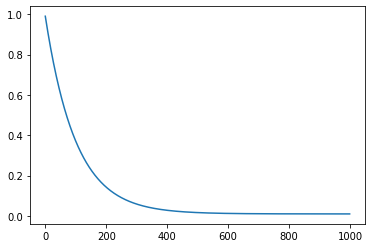

In [53]:
#exploration vs exploitation
import math
EPS_START = 0.99       # starting value of epsilon
EPS_END = 0.01         # Ending value of epsilon
EPS_DECAY = 100         # Rate by which epsilon to be decayed

epsilon_by_epsiode = lambda frame_idx: EPS_END + (EPS_START - EPS_END) * math.exp(-1. * frame_idx /EPS_DECAY)

plt.plot([epsilon_by_epsiode(i) for i in range(1000)])

Episode 1000	Average loss Score: nan


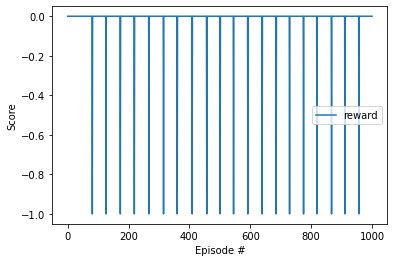

0 -21.0 True
Episode 2000	Average loss Score: nan


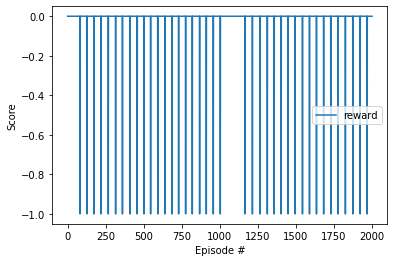

0 -42.0 True
Episode 3000	Average loss Score: nan


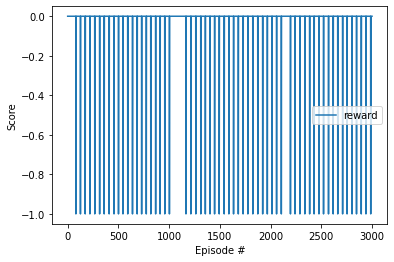

0 -63.0 True
Episode 4000	Average loss Score: nan


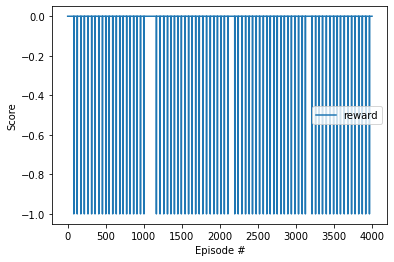

0 -84.0 True


In [54]:
#the training loop 
from collections import deque


frames1=pre.stack_frames(None, env.reset(), True)
state=prepare_state(frames1)

GWagent = RelationalModel()
GWagent= GWagent.to(device)

Tnet = RelationalModel()
Tnet= Tnet.to(device)
maxsteps = 400
env.max_steps = maxsteps
env.env.max_steps = maxsteps
#loss
los=[]
#rewards
rewards= []
 

epochs = 50000
epochs = 5000
replay_size = 9000
batch_size = 50
#batch_size = 5
#lr = 0.0005
lr = 0.0001
gamma = 0.99
replay = deque(maxlen=replay_size)
opt = torch.optim.Adam(params=GWagent.parameters(),lr=lr)
eps = 0.5
update_freq = 100

score=0
for i in range(epochs):
    pred = GWagent(state.to(device))
    action = int(torch.argmax(pred).detach().cpu().numpy())
    eps = epsilon_by_epsiode(i)
    if np.random.rand()< eps:
        action = int(torch.randint(0,5,size=(1,)).squeeze())
    action_d = action_map[action]
    state2, reward, done, info = env.step(action_d)
    #reward = -0.01 if reward == 0 else reward
    rewards.append(reward)
    score= score+reward
    
    frames2= pre.stack_frames(frames1, state2, False)
    state2 = prepare_state(frames2)
    exp = (state,action,reward,state2,done)
    replay = update_replay(replay,exp,replay_size)
    if done:
        print(action,score,done)
        frames1=pre.stack_frames(None, env.reset(), True)
        state=prepare_state(frames1)
    else:
        frames1= frames2
        state = state2
    if len(replay) > batch_size:
        
        opt.zero_grad()
        
        state_batch,action_batch,reward_batch,state2_batch,done_batch = get_minibatch(replay,batch_size)
        
        #q_pred = GWagent(state_batch).cpu()
        q_pred = GWagent(state_batch)
        astar = torch.argmax(q_pred,dim=1).to(device)
        qs =Tnet(state2_batch).gather(dim=1,index=astar.unsqueeze(dim=1)).squeeze()
        
        targets = get_qtarget_ddqn(qs.detach(),reward_batch.detach(),gamma,done_batch)
        
        loss = lossfn(q_pred.to(device),targets.detach().to(device),action_batch.to(device))
        loss.backward()
        los.append(loss)
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(los)), end="")

        if i % 1000 == 0:
          showLoss(rewards, los, i)
        torch.nn.utils.clip_grad_norm_(GWagent.parameters(), max_norm=1.0)
        opt.step()
    if i % update_freq == 0:
        Tnet.load_state_dict(GWagent.state_dict())

In [ ]:
------------------------------------------------------

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 1            |        cudaMalloc retries: 1         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   13699 MB |   13699 MB |   13700 MB |    1135 KB |\n|       from large pool |   13695 MB |   13695 MB |   13695 MB |       0 KB |\n|       from small pool |       3 MB |       3 MB |       4 MB |    1135 KB |\n|---------------------------------------------------------------------------|\n| Active memory         |   13699 MB |   13699 MB |   13700 MB |    1135 KB |\n|       from large pool |   13695 MB |   13695 MB |